In [1]:
import sys
sys.path.append("../")

In [2]:
from scipy import special
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
from delay.delay import *
import delay.model as model

import delay.calculator as calc
from delay.strategy import fA_HardInterval, fB_HardInterval, showIntervalFunctions
from delay.simulation import Simulation, FunctionType
from delay.regression import linearRegression, Dependence
from delay.value import calculateValue

In [15]:
N=100

In [3]:
def printNice(h, digits=5):
    h = [round(x, ndigits=digits) for x in h]
    N = int(len(h))-1
    for i in range(int(len(h)/10)):
        print(int(i*10-N/2), ': ', h[slice(i*10, (i+1)*10)])

In [57]:
simulation = Simulation(FunctionType.HARD_INTERVAL, (20, 0), calculateValue, calc.linear(N=100, w=0.99))
simulation.setN(100)
simulation.setConv(100)
simulation.setDuration(10000000) # 10^7
simulation.setD(20)
simulation.run()

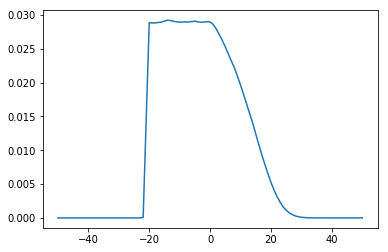

-50 :  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
-40 :  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
-30 :  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7e-05, 0.0145]
-20 :  [0.02886, 0.02882, 0.02885, 0.0289, 0.02894, 0.02911, 0.02923, 0.02919, 0.02908, 0.02899]
-10 :  [0.02895, 0.02896, 0.02898, 0.02897, 0.02903, 0.02909, 0.029, 0.02892, 0.02897, 0.02902]
0 :  [0.02898, 0.02862, 0.02796, 0.02714, 0.02625, 0.0253, 0.02424, 0.02318, 0.02216, 0.02093]
10 :  [0.01963, 0.01828, 0.01684, 0.01544, 0.01403, 0.01242, 0.01084, 0.00932, 0.00791, 0.00654]
20 :  [0.00525, 0.00414, 0.00315, 0.00233, 0.00163, 0.00113, 0.00075, 0.0005, 0.0003, 0.00018]
30 :  [0.0001, 5e-05, 2e-05, 1e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
40 :  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [58]:
h = np.histogram(simulation.x, bins=np.linspace(-N/2-0.5, N/2+0.5, N+2), density=True)[0].tolist()
model.plot(h);
printNice(h)

µ =  -3.1066258018877035


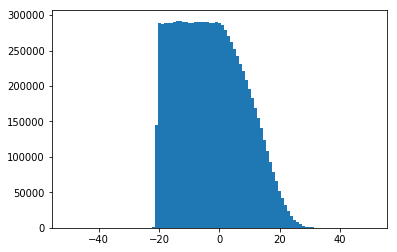

In [59]:
simulation.plotOnlyHistogram()

In [40]:
from importlib import reload
reload(model);

In [53]:
r = model.initialRightProbabilities(100, 20, 0.01)
for _ in range(10):
    stationary = model.probabilities2Stationary(r)
    for __ in range(5):
        r = model.rightProbabilitiesWithSampling(stationary, r, epsilon=0.01, d=20, tau=20)

-50 :  [0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99]
-40 :  [0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99]
-30 :  [0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99]
-20 :  [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
-10 :  [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
0 :  [0.5, 0.49999, 0.49999, 0.49997, 0.49997, 0.49991, 0.49993, 0.49976, 0.4998, 0.49924]
10 :  [0.49937, 0.49756, 0.49832, 0.49278, 0.49453, 0.47535, 0.48304, 0.4407, 0.45702, 0.36896]
20 :  [0.38493, 0.3939, 0.41468, 0.26527, 0.29652, 0.16313, 0.17273, 0.10525, 0.13355, 0.0925]
30 :  [0.10846, 0.06703, 0.09728, 0.06667, 0.09773, 0.0738, 0.09744, 0.06911, 0.10126, 0.07471]
40 :  [0.10239, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01]


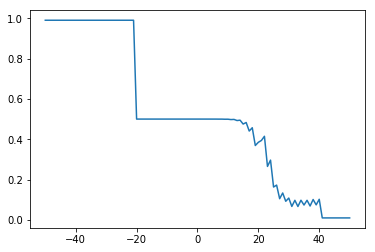

In [54]:
printNice(r)
model.plot(r);

-50 :  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
-40 :  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
-30 :  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00013, 0.01284]
-20 :  [0.02542, 0.02542, 0.02542, 0.02542, 0.02542, 0.02542, 0.02542, 0.02542, 0.02542, 0.02542]
-10 :  [0.02542, 0.02542, 0.02542, 0.02542, 0.02542, 0.02542, 0.02542, 0.02542, 0.02542, 0.02542]
0 :  [0.02542, 0.02542, 0.02542, 0.02541, 0.02541, 0.02541, 0.0254, 0.02538, 0.02536, 0.02531]
10 :  [0.02524, 0.02509, 0.02488, 0.02444, 0.02383, 0.02246, 0.02065, 0.01784, 0.01448, 0.01049]
20 :  [0.00629, 0.00399, 0.00269, 0.00152, 0.00057, 0.0002, 4e-05, 1e-05, 0.0, 0.0]
30 :  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
40 :  [0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0]


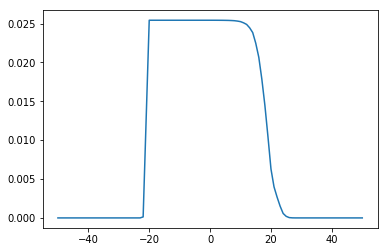

In [55]:
stationary = model.probabilities2Stationary(r)
printNice(stationary)
model.plot(stationary)

In [56]:
y = np.linspace(-N/2, N/2, num=N+1)
np.dot(stationary, y)

-1.2358969220056093